In [1]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim

In [2]:
from utils import get_device , visualize_data

device = get_device()

Device :  cuda


In [3]:
from dataset import CIFAR10

data = CIFAR10()

train_loader , test_loader = data.get_loaders()

100%|██████████| 170498071/170498071 [00:01<00:00, 101885292.14it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [4]:
classes = [
            "plane",
            "car",
            "bird",
            "cat",
            "deer",
            "dog",
            "frog",
            "horse",
            "ship",
            "truck",
        ]

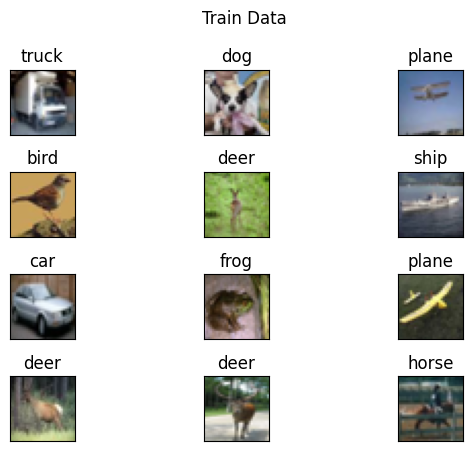

In [5]:
visualize_data(train_loader,12,"Train Data",classes)

# Model

## GroupNorm

In [6]:
from model import Model

In [7]:
model1 = Model(norm_type="group", dropout=0.01, skip=True).to(device)
from torchsummary import summary
summary(model1 , input_size = (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
         GroupNorm-2           [-1, 16, 30, 30]              32
              ReLU-3           [-1, 16, 30, 30]               0
           Dropout-4           [-1, 16, 30, 30]               0
         ConvLayer-5           [-1, 16, 30, 30]               0
            Conv2d-6           [-1, 16, 28, 28]           2,304
         GroupNorm-7           [-1, 16, 28, 28]              32
              ReLU-8           [-1, 16, 28, 28]               0
           Dropout-9           [-1, 16, 28, 28]               0
        ConvLayer-10           [-1, 16, 28, 28]               0
           Conv2d-11           [-1, 24, 28, 28]             384
        MaxPool2d-12           [-1, 24, 14, 14]               0
           Conv2d-13           [-1, 24, 14, 14]           5,184
        GroupNorm-14           [-1, 24,

In [8]:
from backprop import train , test

In [9]:
optimizer = optim.SGD(model1.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=0, verbose=True, factor=0.3)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

EPOCHS = 20

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model1, device, train_loader, optimizer, epoch, train_losses, train_acc)
    test_loss = test(model1, device, test_loader, test_losses, test_acc)
    scheduler.step(test_loss)

EPOCH: 0


Loss=1.5702682733535767 Batch_id=390 Accuracy=30.51: 100%|██████████| 391/391 [00:20<00:00, 18.63it/s]



Test set: Average loss: 1.6238, Accuracy: 4131/10000 (41.31%)

EPOCH: 1


Loss=1.3606635332107544 Batch_id=390 Accuracy=45.68: 100%|██████████| 391/391 [00:22<00:00, 17.67it/s]



Test set: Average loss: 1.4147, Accuracy: 4803/10000 (48.03%)

EPOCH: 2


Loss=1.3001643419265747 Batch_id=390 Accuracy=53.54: 100%|██████████| 391/391 [00:20<00:00, 18.83it/s]



Test set: Average loss: 1.2174, Accuracy: 5540/10000 (55.40%)

EPOCH: 3


Loss=1.0039290189743042 Batch_id=390 Accuracy=58.85: 100%|██████████| 391/391 [00:21<00:00, 18.61it/s]



Test set: Average loss: 1.0586, Accuracy: 6176/10000 (61.76%)

EPOCH: 4


Loss=1.0300462245941162 Batch_id=390 Accuracy=62.46: 100%|██████████| 391/391 [00:20<00:00, 19.25it/s]



Test set: Average loss: 0.9788, Accuracy: 6495/10000 (64.95%)

EPOCH: 5


Loss=0.9514040946960449 Batch_id=390 Accuracy=65.40: 100%|██████████| 391/391 [00:19<00:00, 19.65it/s]



Test set: Average loss: 0.9901, Accuracy: 6456/10000 (64.56%)

Epoch 00006: reducing learning rate of group 0 to 3.0000e-03.
EPOCH: 6


Loss=0.6263344287872314 Batch_id=390 Accuracy=69.82: 100%|██████████| 391/391 [00:20<00:00, 19.32it/s]



Test set: Average loss: 0.8691, Accuracy: 6892/10000 (68.92%)

EPOCH: 7


Loss=0.74859619140625 Batch_id=390 Accuracy=70.89: 100%|██████████| 391/391 [00:20<00:00, 19.53it/s]



Test set: Average loss: 0.8638, Accuracy: 6937/10000 (69.37%)

EPOCH: 8


Loss=0.7784892320632935 Batch_id=390 Accuracy=71.61: 100%|██████████| 391/391 [00:20<00:00, 18.81it/s]



Test set: Average loss: 0.8334, Accuracy: 7069/10000 (70.69%)

EPOCH: 9


Loss=0.7553216218948364 Batch_id=390 Accuracy=72.37: 100%|██████████| 391/391 [00:21<00:00, 17.97it/s]



Test set: Average loss: 0.8197, Accuracy: 7104/10000 (71.04%)

EPOCH: 10


Loss=0.6526589393615723 Batch_id=390 Accuracy=73.02: 100%|██████████| 391/391 [00:20<00:00, 18.72it/s]



Test set: Average loss: 0.8346, Accuracy: 6987/10000 (69.87%)

Epoch 00011: reducing learning rate of group 0 to 9.0000e-04.
EPOCH: 11


Loss=0.6840626001358032 Batch_id=390 Accuracy=74.66: 100%|██████████| 391/391 [00:20<00:00, 18.75it/s]



Test set: Average loss: 0.7991, Accuracy: 7120/10000 (71.20%)

EPOCH: 12


Loss=0.7237985730171204 Batch_id=390 Accuracy=74.95: 100%|██████████| 391/391 [00:20<00:00, 18.82it/s]



Test set: Average loss: 0.7836, Accuracy: 7211/10000 (72.11%)

EPOCH: 13


Loss=0.5687410235404968 Batch_id=390 Accuracy=75.35: 100%|██████████| 391/391 [00:20<00:00, 18.98it/s]



Test set: Average loss: 0.7887, Accuracy: 7211/10000 (72.11%)

Epoch 00014: reducing learning rate of group 0 to 2.7000e-04.
EPOCH: 14


Loss=0.6765328645706177 Batch_id=390 Accuracy=76.11: 100%|██████████| 391/391 [00:19<00:00, 19.59it/s]



Test set: Average loss: 0.7740, Accuracy: 7224/10000 (72.24%)

EPOCH: 15


Loss=0.7232760787010193 Batch_id=390 Accuracy=76.10: 100%|██████████| 391/391 [00:20<00:00, 19.49it/s]



Test set: Average loss: 0.7739, Accuracy: 7239/10000 (72.39%)

EPOCH: 16


Loss=0.5097299814224243 Batch_id=390 Accuracy=76.16: 100%|██████████| 391/391 [00:19<00:00, 19.57it/s]



Test set: Average loss: 0.7777, Accuracy: 7232/10000 (72.32%)

Epoch 00017: reducing learning rate of group 0 to 8.1000e-05.
EPOCH: 17


Loss=0.6911399960517883 Batch_id=390 Accuracy=76.43: 100%|██████████| 391/391 [00:21<00:00, 18.25it/s]



Test set: Average loss: 0.7696, Accuracy: 7254/10000 (72.54%)

EPOCH: 18


Loss=0.6949650049209595 Batch_id=390 Accuracy=76.46: 100%|██████████| 391/391 [00:20<00:00, 18.96it/s]



Test set: Average loss: 0.7679, Accuracy: 7253/10000 (72.53%)

EPOCH: 19


Loss=0.7192263007164001 Batch_id=390 Accuracy=76.55: 100%|██████████| 391/391 [00:20<00:00, 18.72it/s]



Test set: Average loss: 0.7682, Accuracy: 7247/10000 (72.47%)

Epoch 00020: reducing learning rate of group 0 to 2.4300e-05.


### Plotting

In [10]:
from backprop import plot_graphs ,get_misclassified_images , show_misclassified_images

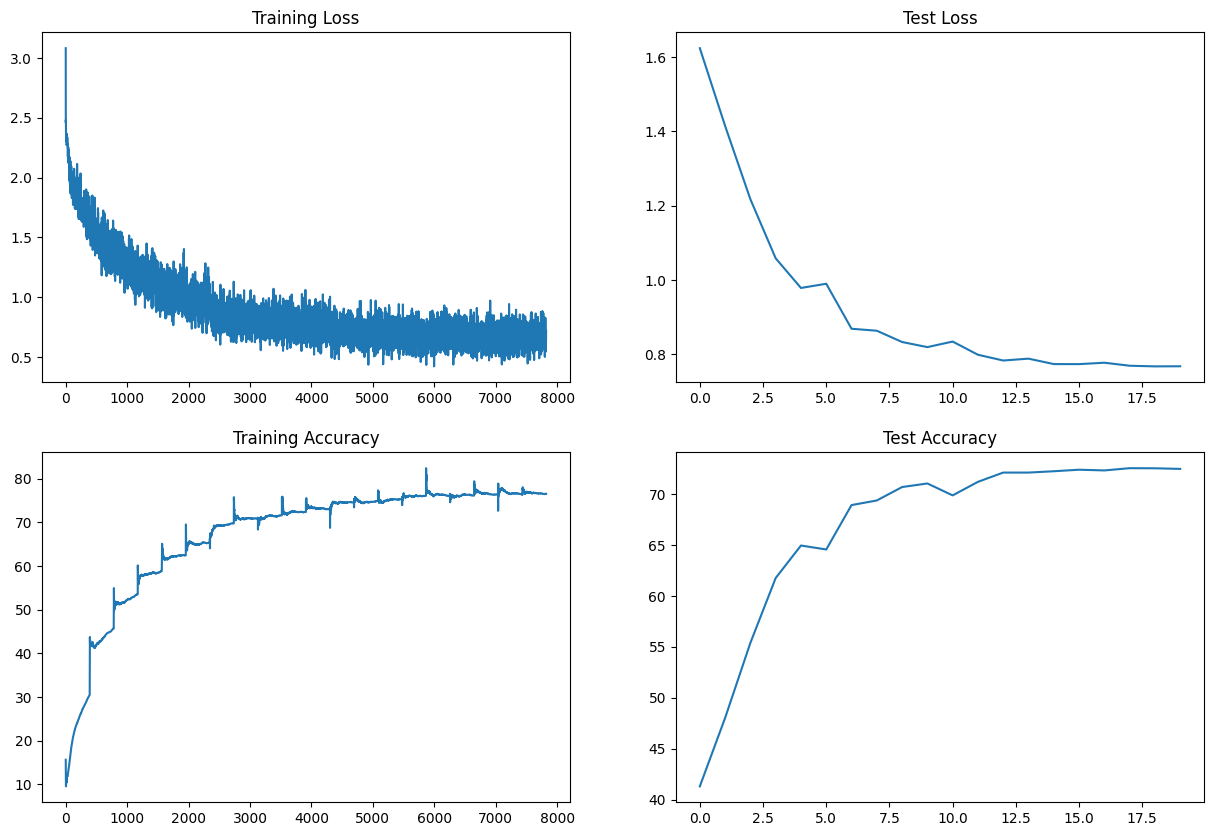

In [11]:
plot_graphs(train_losses , train_acc , test_losses , test_acc)

In [12]:
misclassified_images, predictions, labels = get_misclassified_images(model1 , test_loader , device)

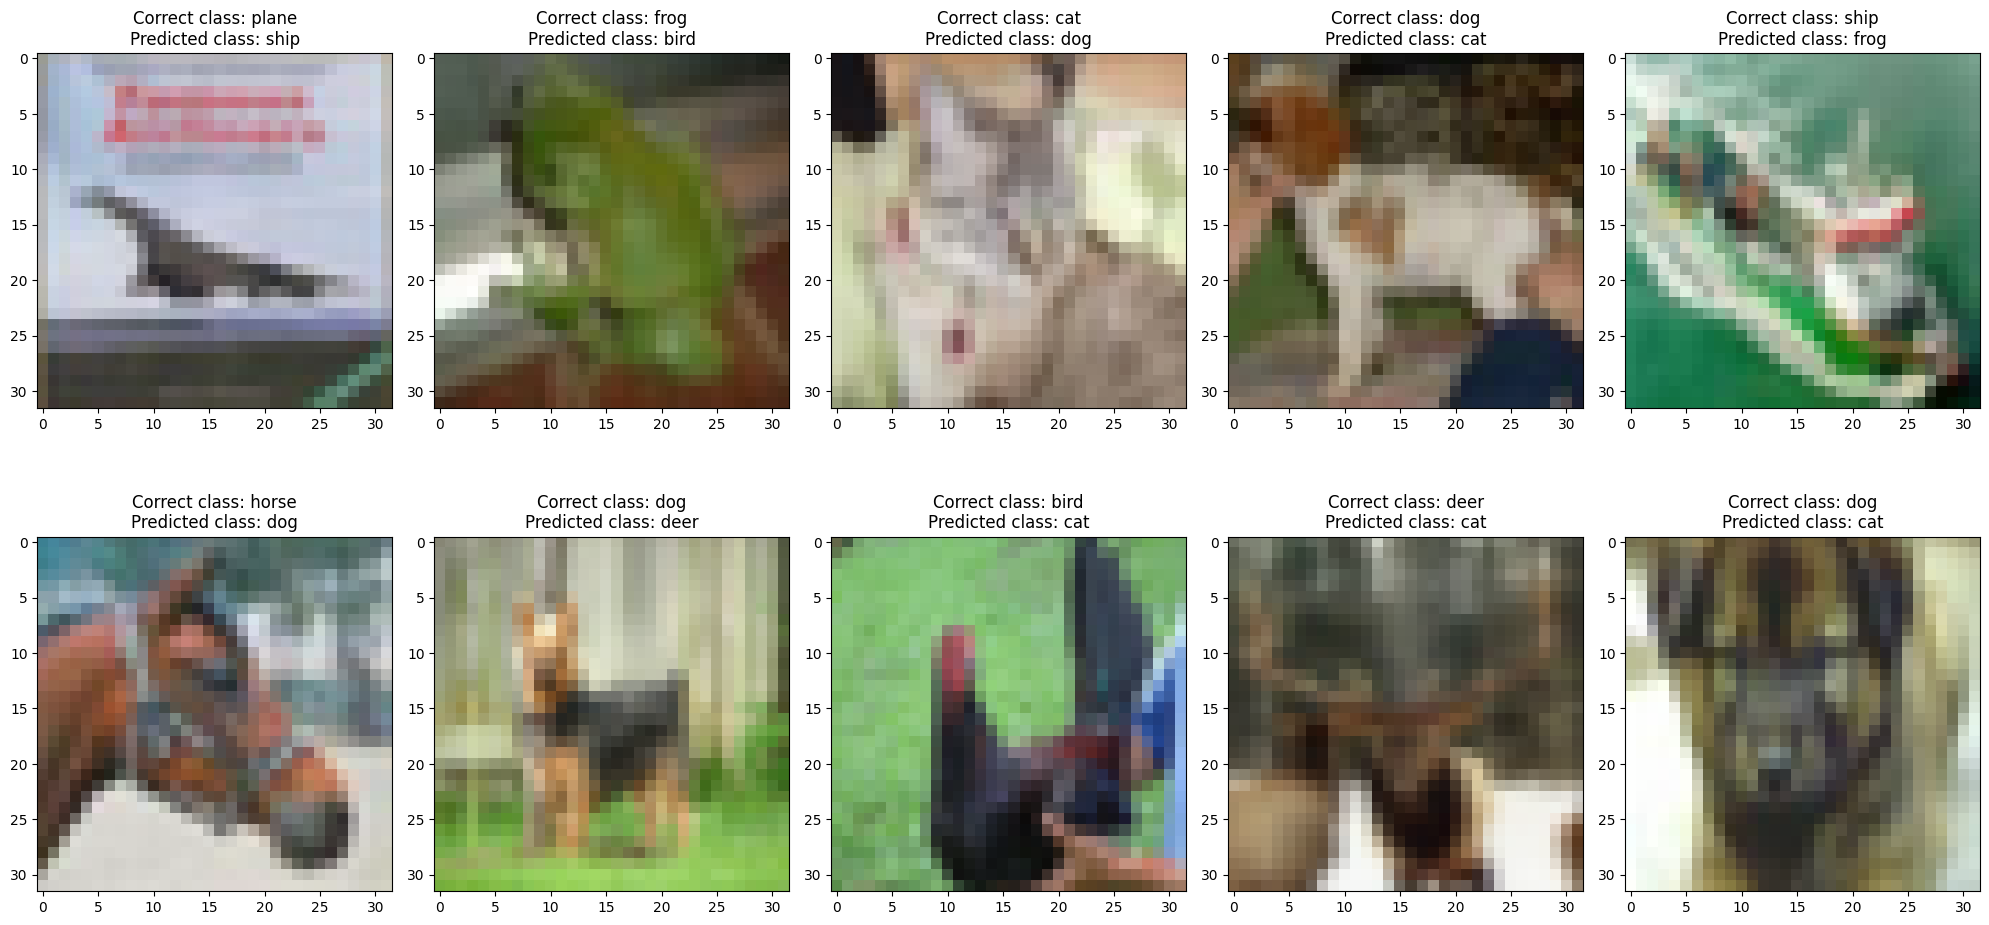

In [13]:
show_misclassified_images(
    misclassified_images[:10],
    predictions[:10],
    labels[:10],
    classes,
)